In [20]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [21]:
df=pd.read_csv(r"C:\Users\k siva rao\Downloads\bank.csv")

In [22]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [23]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [24]:
df.duplicated().sum()

0

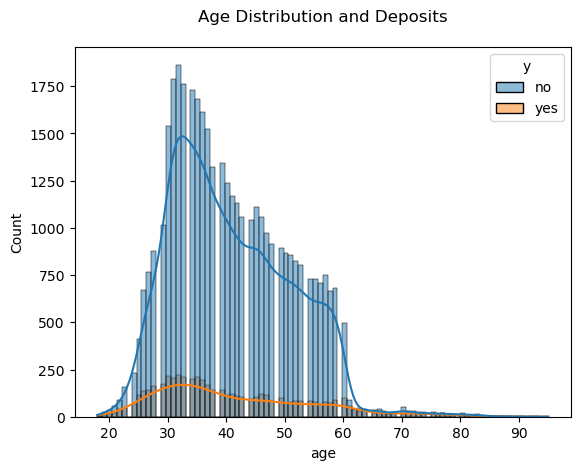

In [27]:
sns.histplot(x="age", data=df, kde=True, hue= "y")
plt.title("Age Distribution and Deposits\n")
plt.show()


# Distribution of Occupation

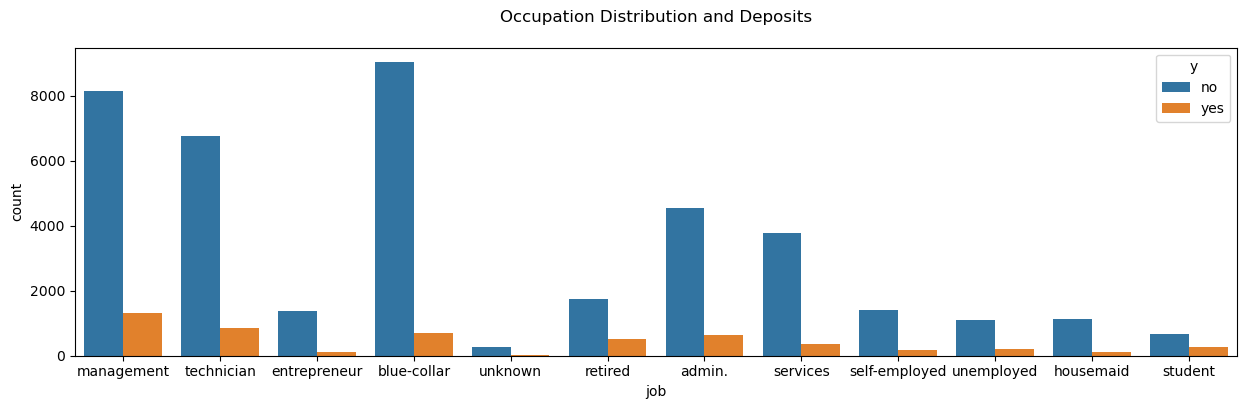

In [30]:
plt.figure(figsize=(15,4))
sns.countplot(x="job", data= df, hue ="y")
plt.title("Occupation Distribution and Deposits\n")
plt.show()


# Distribution of Marital Status

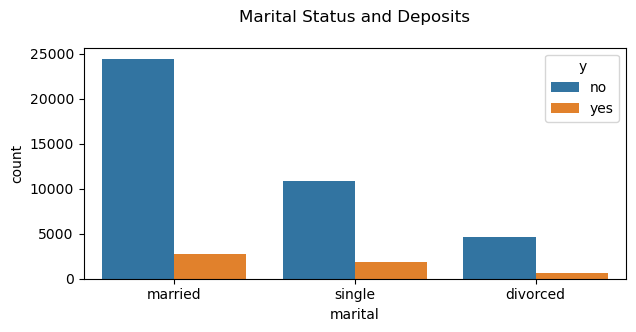

In [31]:
plt.figure(figsize=(7,3))
sns.countplot(x="marital", data= df, hue ="y")
plt.title("Marital Status and Deposits\n")
plt.show()


# Distribution of Education Status

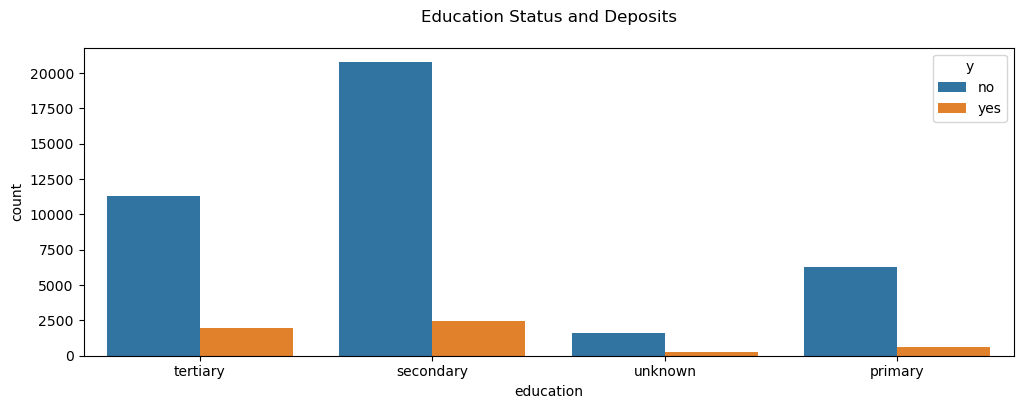

In [37]:
plt.figure(figsize=(12,4))
sns.countplot(x="education", data= df,hue ="y")
plt.title("Education Status and Deposits\n")
plt.show()

# Credit defaults - any ?

In [38]:
df.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

# Distribution of Housing Loan

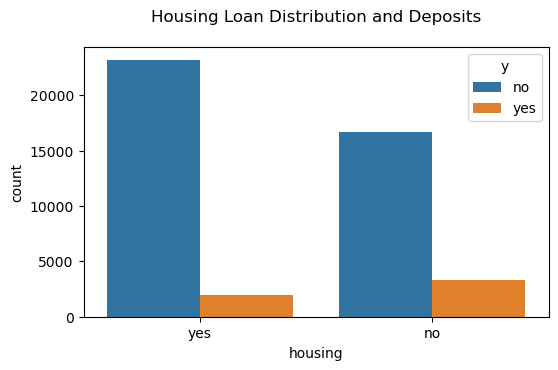

In [39]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="housing", data= df, hue ="y")
plt.title("Housing Loan Distribution and Deposits\n")
plt.show()


# Distribution of Personal Loan

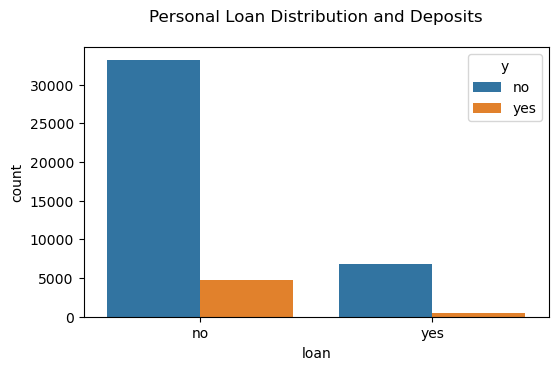

In [40]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="loan", data= df, hue ="y")
plt.title("Personal Loan Distribution and Deposits\n")
plt.show()


# Label Encoding Categorical Feature

In [44]:
cols = df.select_dtypes("object").columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [48]:
le = LabelEncoder()
df[cols] = df[cols].apply(le.fit_transform)

In [49]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0


# Correlation Analysis using Heatmap

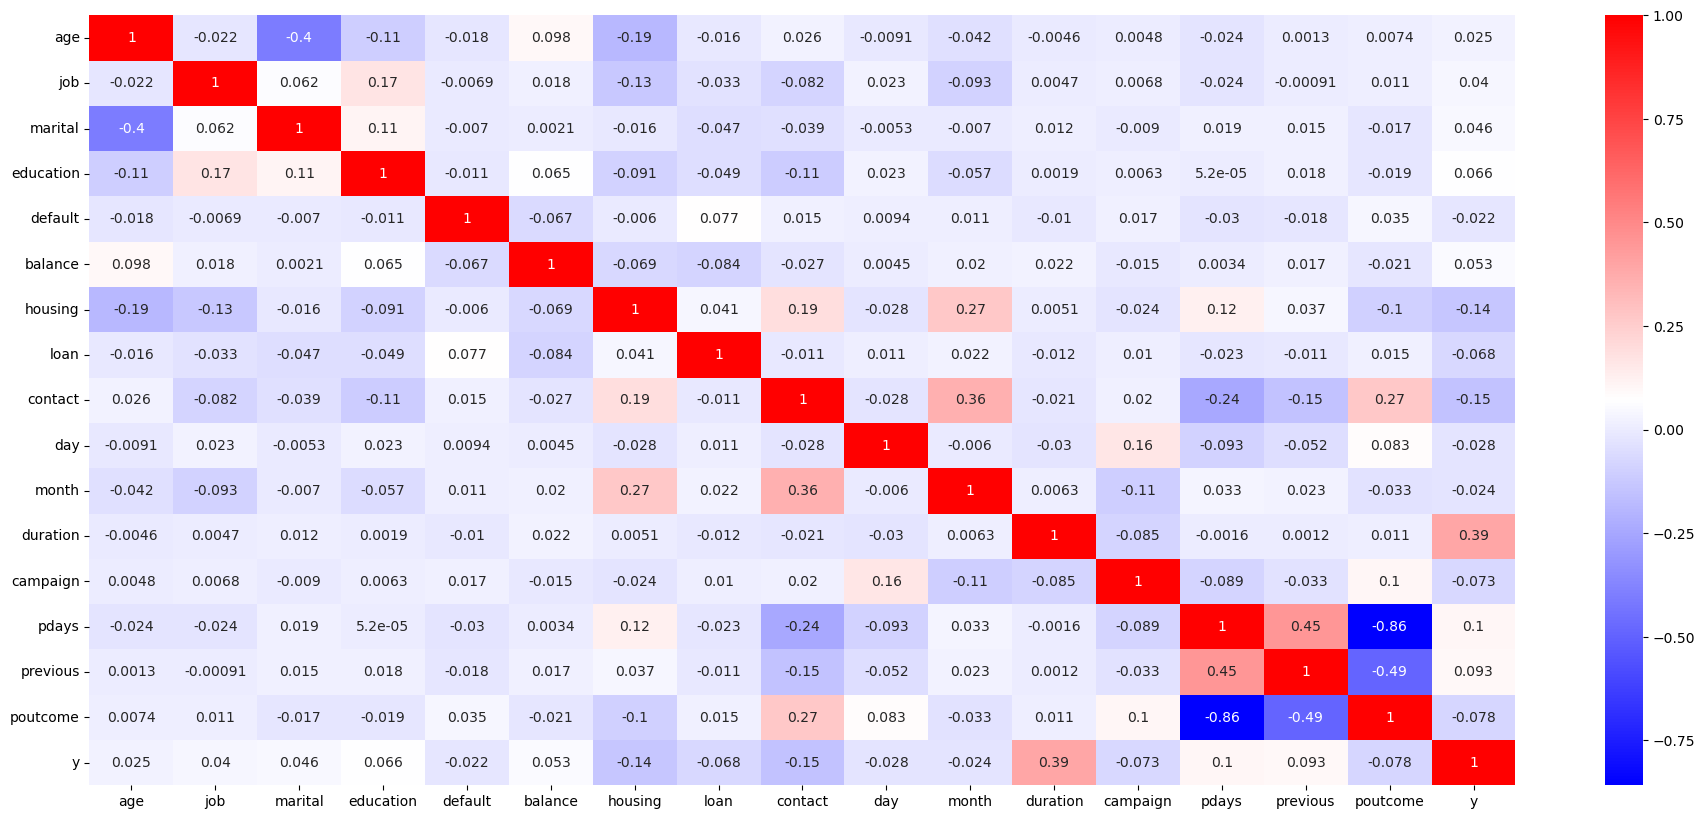

In [50]:
plt.figure(figsize=(23,10))
sns.heatmap(df.corr(), cmap='bwr', annot=True)
plt.show()


Outcome "y" is positively correlated with duration of call and also shows slight correlation with previous attempts of call. This implies that clients went ahead with Term deposits subscription after gaining sufficient insights from bank calls and persuation.
multicolinearty can be seen among some input features. This can be handled by dropping those variables or by performing LDA(Linear discriminant analysis) on the data.

# Standardisation

In [52]:
#Splitting input and output
X = df.drop("y", axis=1)
y = df.y


In [53]:
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

# Model building - Decision Tree Classifier

In [54]:
#Train-test split
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3)

In [55]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)

DecisionTreeClassifier()

In [56]:
print('Train Score: {}'.format(decision_tree.score(train_X, train_y)))  
print('Test Score: {}'.format(decision_tree.score(test_X, test_y)))   

Train Score: 1.0
Test Score: 0.8792391624889413


In [58]:
cross_val_score(decision_tree, train_X, train_y, cv=5).mean()

0.8724679719748384

In [59]:
ypred = decision_tree.predict(test_X)
print(classification_report(test_y,ypred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11938
           1       0.50      0.49      0.49      1626

    accuracy                           0.88     13564
   macro avg       0.71      0.71      0.71     13564
weighted avg       0.88      0.88      0.88     13564




# Hyperparameter tunning

In [60]:
#Applying Grid search cv to find best estimaters to improve model performance

In [64]:
param_grid = {
    'max_depth': [3, 5, 7,10, None],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf': [3, 5, 7, 9,10,20]
    }

In [65]:
gscv = GridSearchCV(decision_tree, param_grid, cv=5, verbose=1)
gscv.fit(train_X, train_y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [3, 5, 7, 9, 10, 20]},
             verbose=1)

In [66]:
GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [3, 5, 7, 9, 10, 20]},
             verbose=1)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [3, 5, 7, 9, 10, 20]},
             verbose=1)

In [67]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 7}

In [68]:
gscv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=7)

In [70]:
cross_val_score(gscv.best_estimator_, train_X, train_y, cv=5).mean()

0.8995479870612394

In [71]:
#we will use this best estimators to built our model.

In [72]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf = 3)
clf.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [73]:
print('Train Score: {}'.format(clf.score(train_X, train_y)))
print('Test Score: {}'.format(clf.score(test_X, test_y)))

Train Score: 0.9016968433026827
Test Score: 0.9006930109112357


In [74]:
pred_y = clf.predict(test_X)

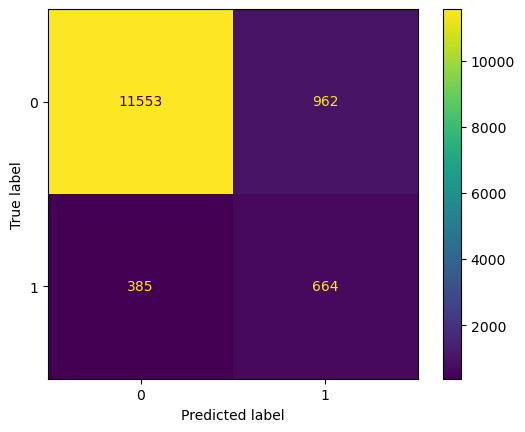

In [76]:
#Confusion Matrix
cm = confusion_matrix(pred_y, test_y)
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()
plt.show()

In [77]:
#Classification Report
print(classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94     12515
           1       0.41      0.63      0.50      1049

    accuracy                           0.90     13564
   macro avg       0.69      0.78      0.72     13564
weighted avg       0.92      0.90      0.91     13564



In [78]:
#Accuracy Score
accuracy = accuracy_score(test_y,pred_y)
print("Test Accuracy of Decision Tree Classifier : {}".format(accuracy*100))

Test Accuracy of Decision Tree Classifier : 90.06930109112356


In [79]:
#Cross Validation Score
Cross_val = cross_val_score(clf, test_X,test_y, cv=5).mean()     
print("Cross-Validation Accuracy Scores Decision Tree : ",Cross_val*100)

Cross-Validation Accuracy Scores Decision Tree :  89.73754684915957


# Visualizing the Tree

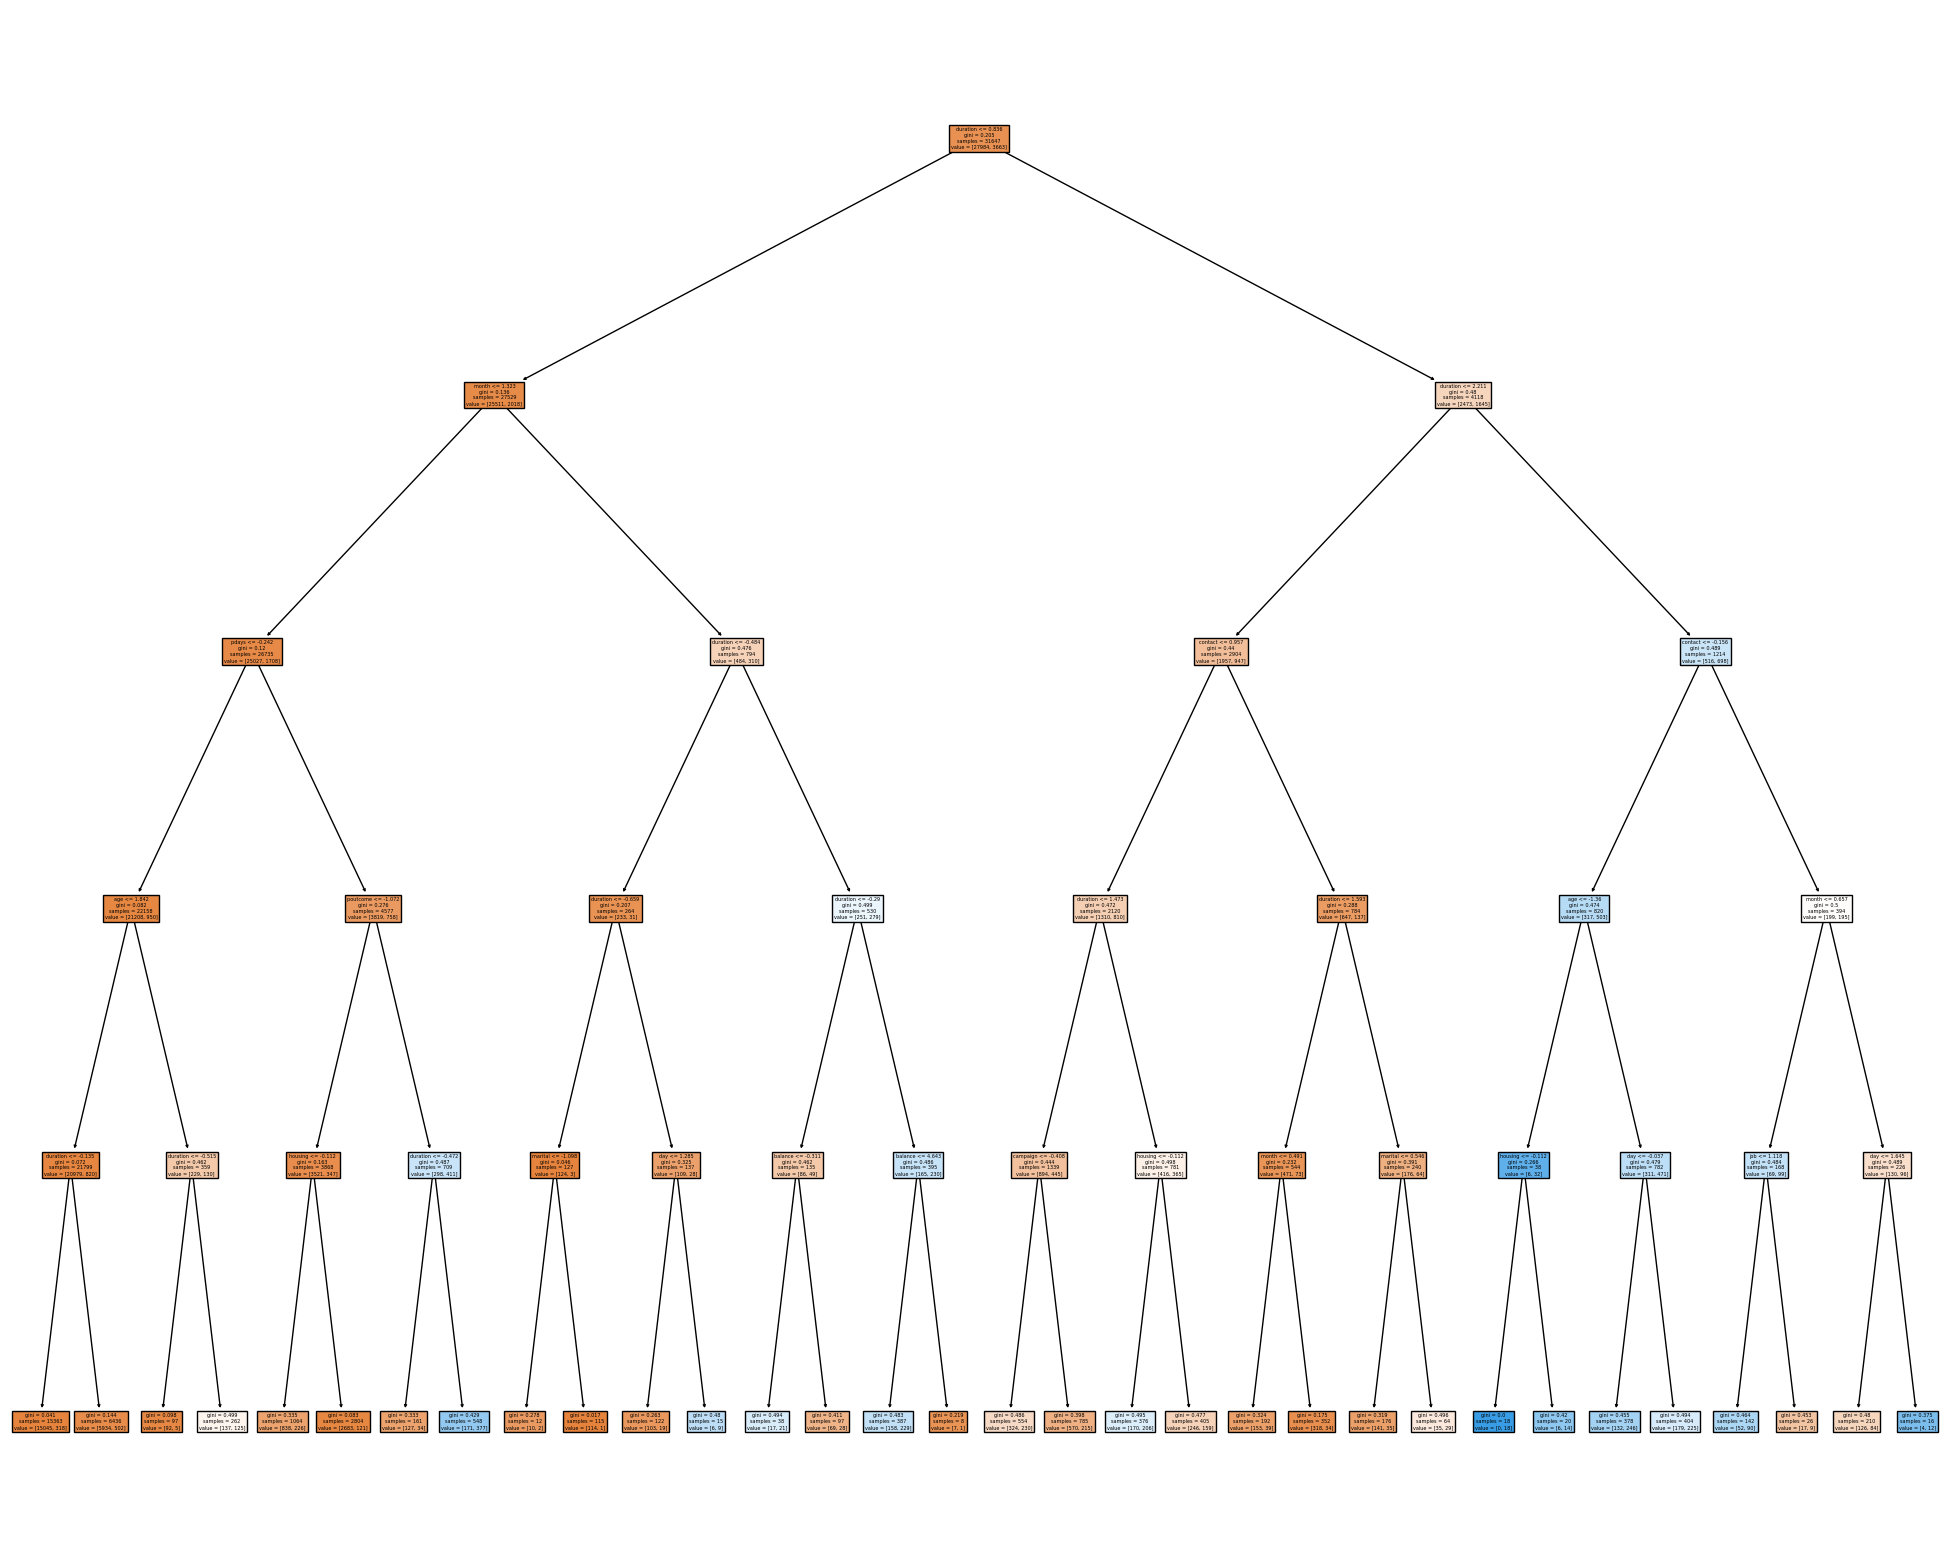

In [80]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
t= tree.plot_tree(clf,filled=True,feature_names=X.columns)

Conclusion and Key Insights
In this project, we embarked on a journey to build a predictive model for term deposit subscriptions in a banking context to help a Portuguese banking institution tailor its marketing efforts effectively. Let's recap the key takeaways and insights from this endeavor:

Data Pre-processing:

The initial data inspection revealed a well-structured dataset with no missing values. While we encountered some duplicate entries, they were not considered errors but rather different campaigns targeting the same clients.

Exploratory Data Analysis (EDA):

The age distribution of clients highlighted that the majority fell in the 30-40 age range, coinciding with the highest subscription rate for term deposits.
Occupation-wise, clients in administrative, blue-collar and technician roles formed the majority and were more likely to subscribe to term deposits.
Marital status leaned heavily toward the "married" category.
Clients with university degrees or high-level education were more prominent and had a higher subscription rate.
Credit defaults were rare, with the vast majority of clients having no credit defaults.
Clients with housing loans were more likely to subscribe to term deposits, while those with personal loans were less likely.

Model Building and Evaluation:

We implemented a Decision Tree classifier to predict term deposit subscriptions.
The model exhibited strong performance, achieving an accuracy rate of approximately 91.52% on both training and testing data.
Cross-validation confirmed the robustness of our model, with an accuracy score of around 91.60%.
The classification report revealed a balanced model with reasonable precision, recall, and F1-scores for both subscribed and non-subscribed clients.

Insights:

The duration of calls was a significant predictor of term deposit subscriptions. Clients tended to subscribe after longer conversations, suggesting the importance of engaging clients effectively during calls.
Previous attempts at contact also played a role, indicating that repeated contact can be fruitful in convincing clients to subscribe.
Multicollinearity among some input features was observed, potentially affecting model performance. Consideration should be given to addressing this issue in future iterations.

Future Directions:

To further enhance predictive accuracy, exploring other machine learning algorithms or ensemble methods could be beneficial. Feature engineering and selection methods could be employed to mitigate multicollinearity. Incorporating external data sources, such as economic indicators or market trends, may provide additional insights and improve model performance. A real-time deployment of the model into the bank's operational systems can automate decision-making and streamline marketing efforts.

Thank you !

Project by: k siva rao